In [18]:
import numpy as np
import pandas as pd

In [19]:
ratings = pd.read_csv('./ratings.csv')
movies = pd.read_csv('./movies.csv')
ratings = pd.merge(movies,ratings).drop(['genres','timestamp'],axis=1)
print(ratings.shape)
ratings.head()

(100836, 4)


,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


# Exploratory Data Analysis

In [32]:
#highest ratings
ratings.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [33]:
#most ratings
ratings.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [35]:
mov_ratings = pd.DataFrame(ratings.groupby('title')['rating'].mean())
mov_ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [36]:
mov_ratings['num of ratings'] = pd.DataFrame(ratings.groupby('title')['rating'].count())
mov_ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

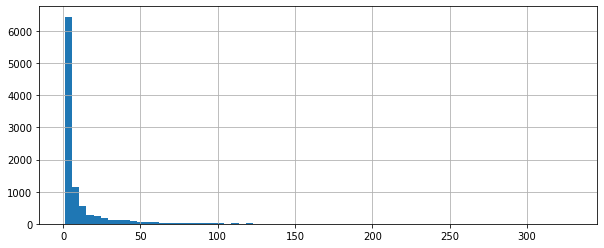

In [40]:
plt.figure(figsize=(10,4))
mov_ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

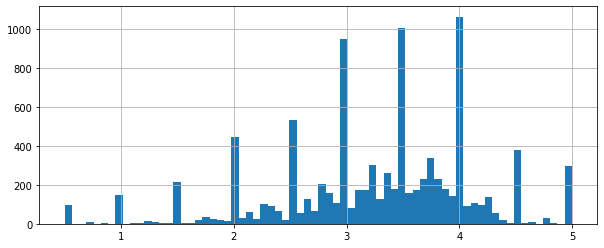

In [41]:
plt.figure(figsize=(10,4))
mov_ratings['rating'].hist(bins=70)

In [42]:
mov_ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


# Recommending Movies

In [44]:
userRatings = ratings.pivot_table(index=['userId'],columns=['title'],values='rating')
userRatings.head()
#so you will see so many NaN ratings

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

In [21]:
userRatings.shape

(610, 9719)

In [22]:
#we will gonna fill NaN with 0
#drop row if movie is not rating by more than 10 users
userRatings = userRatings.dropna(thresh=10, axis=1).fillna(0,axis=1)
userRatings.shape

(610, 2269)

In [23]:
corrMatrix = userRatings.corr(method='pearson')
corrMatrix.head(100)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Almost Famous (2000),0.099554,0.209549,0.032088,0.296727,0.134434,0.118628,0.242958,0.079158,0.005092,0.051279,...,0.244619,0.085395,0.072505,0.221259,0.126008,0.362571,0.011577,0.208008,0.186599,0.147413
Along Came Polly (2004),0.027287,0.282426,0.113213,0.193085,0.162678,0.180259,0.112928,0.121704,0.125792,0.124032,...,0.173133,0.160430,0.029076,0.189165,0.166278,0.309183,0.078468,-0.036498,0.231566,0.025928
Along Came a Spider (2001),0.064762,-0.003205,0.016372,0.085365,-0.018241,0.080388,0.094016,-0.016678,0.079375,-0.028052,...,0.115347,0.093774,0.085286,0.150757,0.052144,0.174489,0.014189,0.025327,0.233244,0.043581


In [24]:
def get_similar(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(rating-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    #print(type(similar_ratings))
    return similar_ratings

In [25]:
romantic_lover = [("(500) Days of Summer (2009)",5),("Alice in Wonderland (2010)",3),("Aliens (1986)",1),("2001: A Space Odyssey (1968)",2)]
similar_movies = pd.DataFrame()

In [26]:
for movie,rating in romantic_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)

,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
0,0.157792,2.500000,0.356179,0.684973,0.484900,0.372257,0.355353,0.399389,0.338715,0.500338,...,0.936288,0.446637,0.171018,1.036463,0.889309,0.630565,0.540017,0.134034,0.602730,0.314763
1,-0.016276,0.203998,0.126834,0.113241,0.092218,0.085790,0.072825,0.097794,0.083822,0.084897,...,0.159907,0.085502,0.011564,0.176888,0.168302,0.121710,0.072590,0.025695,0.081764,0.027540
2,-0.304722,-0.062634,-0.214700,-0.118754,-0.037059,-0.063992,-0.170195,-0.280090,-0.016283,-0.102493,...,-0.147339,-0.162387,-0.368712,-0.281119,-0.263686,-0.228562,-0.144292,-0.410899,-0.242935,-0.238410
3,-0.102988,-0.056808,-0.049655,-0.042987,-0.021729,-0.055422,-0.051115,-0.097954,-0.061595,-0.070398,...,-0.075325,-0.048607,-0.128795,-0.175166,-0.098088,-0.074205,-0.049626,-0.153017,-0.082048,-0.091432


In [27]:
similar_movies.sum().sort_values(ascending=False).head(10)

(500) Days of Summer (2009)       2.584556
Alice in Wonderland (2010)        1.395229
Silver Linings Playbook (2012)    1.254800
Yes Man (2008)                    1.116264
Adventureland (2009)              1.112235
Marley & Me (2008)                1.108381
About Time (2013)                 1.102192
Crazy, Stupid, Love. (2011)       1.088757
50/50 (2011)                      1.086517
Help, The (2011)                  1.075963
dtype: float64

In [28]:
action_lover = [("Amazing Spider-Man, The (2012)",5),("Mission: Impossible III (2006)",4),("Toy Story 3 (2010)",2),("2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",4)]
similar_movies = pd.DataFrame()

In [29]:
for movie,rating in action_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)

,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
0,0.208546,0.562402,0.374759,0.259505,0.695633,0.240343,0.381986,0.176284,0.303730,0.420922,...,0.876848,0.585878,0.223005,0.657071,1.023717,0.379366,0.932932,0.058779,0.480094,0.359144
1,0.134413,0.226793,0.159314,0.305357,0.312814,0.257647,0.360759,0.154621,0.273341,0.293849,...,0.483694,0.419053,0.060353,0.427869,0.495979,0.467937,0.255335,0.170812,0.555271,0.166005
2,-0.024720,-0.210077,-0.043119,-0.050315,-0.091487,-0.068457,-0.084566,-0.102953,-0.102485,-0.111497,...,-0.157158,-0.092660,-0.004604,-0.149674,-0.187190,-0.133140,-0.186164,0.004871,-0.162235,-0.053808
3,0.126098,0.362859,0.146045,0.362353,0.575936,0.339292,0.417303,0.057454,0.064218,0.309156,...,0.487745,0.352235,0.042930,0.368328,0.387424,0.588792,0.342994,0.099380,0.805254,0.101007


In [30]:
similar_movies.sum().sort_values(ascending=False).head(10)

Amazing Spider-Man, The (2012)                           3.233134
Mission: Impossible III (2006)                           2.874798
2 Fast 2 Furious (Fast and the Furious 2, The) (2003)    2.701477
Over the Hedge (2006)                                    2.229721
Crank (2006)                                             2.176259
Mission: Impossible - Ghost Protocol (2011)              2.159666
Hancock (2008)                                           2.156098
The Amazing Spider-Man 2 (2014)                          2.153677
Hellboy (2004)                                           2.137518
Snakes on a Plane (2006)                                 2.137396
dtype: float64